<a href="https://colab.research.google.com/github/SvetlanaSel/Distributed_systems/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# nodes = 50

In [7]:
#Ширина полосы пропускания
import math
def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,packet_loss, node_failures):
# Константы
  PACKET_SIZE = 1024 # байт
  OVERHEAD = 1.2 # 20% накладных расходов
# Расчет активных узлов
  active_nodes = nodes * (1 - node_failures)
# Расчет количества сообщений в секунду
  messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
# Учет потери пакетов
  effective_messages = messages_per_second * (1 - packet_loss)
# Расчет общего объема данных в секунду
  data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
# Перевод в биты в секунду
  bandwidth_bps = data_per_second * 8
  return bandwidth_bps
 # Входные данные:
# 1. gossip_intervals - список интервалов gossip в секундах
# Тип: список float
# Описание: Определяет, как часто узлы обмениваются информацией
gossip_intervals = [0.2]
# 2. gossip_fanout - количество узлов, которым отправляется
#сообщение за один раунд
# Тип: int
# Описание: Определяет, скольким соседям узел отправляет
#обновления за один раунд gossip
gossip_fanout = 3
# 3. nodes - общее количество узлов в сети
# Тип: int
# Описание: Представляет размер сети
nodes = 50
# 4. packet_loss - процент потери пакетов
# Тип: float (0-1)
# Описание: Определяет долю пакетов, которые не достигают цели
packet_loss = 0.05
# 5. node_failures - процент отказов узлов
# Тип: float (0-1)
# Описание: Определяет долю узлов, которые не функционируют в
#данный момент
node_failures = 0.05
# Расчет и вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с)")
print("-" * 50)
for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  print(f"{interval:^17} | {bandwidth:,.2f}")
# Расчет средней ширины полосы пропускания
average_bandwidth = sum(calculate_bandwidth(interval, gossip_fanout,
nodes, packet_loss, node_failures)
      for interval in gossip_intervals) /len(gossip_intervals)
print("-" * 50)
print(f"Средняя ширина полосы пропускания: {average_bandwidth:,.2f} бит/с")

Gossip Interval (с) | Ширина полосы пропускания (бит/с)
--------------------------------------------------
       0.2        | 6,653,952.00
--------------------------------------------------
Средняя ширина полосы пропускания: 6,653,952.00 бит/с


In [45]:
import math
import random

def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,
packet_loss, node_failures):
 PACKET_SIZE = 1024 # байт
 OVERHEAD = 1.2 # 20% накладных расходов

 active_nodes = nodes * (1 - node_failures)
 messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
 effective_messages = messages_per_second * (1 - packet_loss)
 data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
 bandwidth_bps = data_per_second * 8

 return bandwidth_bps

def estimate_convergence_time(gossip_interval, gossip_fanout, nodes, node_failures):
 active_nodes = nodes * (1 - node_failures)
 infection_rate = gossip_fanout / active_nodes
 rounds_to_infect_99_percent = math.ceil(math.log(0.01) / math.log(1 - infection_rate))
 convergence_time = rounds_to_infect_99_percent * gossip_interval
 return convergence_time

def run_simulation(gossip_intervals, gossip_fanout, nodes, packet_loss, node_failures):
 results = []
 for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  convergence_time = estimate_convergence_time(interval, gossip_fanout, nodes, node_failures)
  results.append((interval, bandwidth, convergence_time))
 return results

# Входные данные
gossip_intervals = [0.2, 0.2]
gossip_fanout = 3
nodes = 50
packet_loss = 0.05
node_failures = 0.05
# Запуск симуляции
results = run_simulation(gossip_intervals, gossip_fanout, nodes,
packet_loss, node_failures)
# Вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)")
print("-" * 80)
for interval, bandwidth, convergence_time in results:
 print(f"{interval:^17} | {bandwidth:^33,.2f} | {convergence_time:^21,.2f}")
# Анализ результатов
print("\nАнализ результатов:")
print("1. Влияние Gossip Interval на использование полосы пропускания:")
for i in range(len(results) - 1):
 bandwidth_change = (results[i+1][1] - results[i][1]) / results[i][1] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, использование полосы пропускания изменяется на {bandwidth_change:.2f}%")
print("\n2. Влияние Gossip Interval на время конвергенции:")
for i in range(len(results) - 1):
 convergence_change = (results[i+1][2] - results[i][2]) / results[i][2] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, время конвергенции изменяется на {convergence_change:.2f}%")

Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)
--------------------------------------------------------------------------------
       0.2        |           6,653,952.00            |         14.20        
       0.2        |           6,653,952.00            |         14.20        

Анализ результатов:
1. Влияние Gossip Interval на использование полосы пропускания:
 При увеличении интервала с 0.2 до 0.2 с, использование полосы пропускания изменяется на 0.00%

2. Влияние Gossip Interval на время конвергенции:
 При увеличении интервала с 0.2 до 0.2 с, время конвергенции изменяется на 0.00%


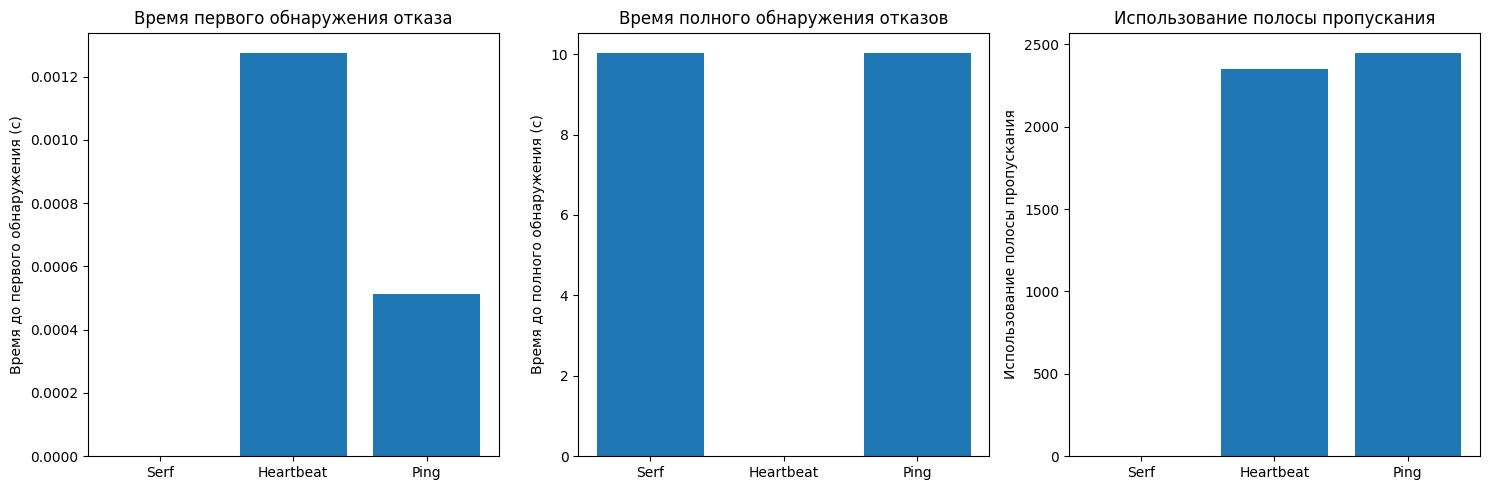

Результаты симуляции:

Serf:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.02 с
Использование полосы пропускания: 0 (условных единиц)

Heartbeat:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 0.00 с
Использование полосы пропускания: 2352 (условных единиц)

Ping:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.03 с
Использование полосы пропускания: 2448 (условных единиц)


In [55]:
import random
import time
import matplotlib.pyplot as plt

class Node:
  def __init__(self, node_id):
    self.id = node_id
    self.knows_failure = False

class BaseSimulator:
  def __init__(self, num_nodes, interval, node_failures):
    self.nodes = [Node(i) for i in range(num_nodes)]
    self.interval = interval
    self.node_failures = node_failures
    self.failed_nodes = set()
    self.bandwidth_usage = 0
  def simulate_failure(self):
    num_failures = int(len(self.nodes) * self.node_failures / 100)
    self.failed_nodes = set(random.sample(range(len(self.nodes)), num_failures))
    if self.failed_nodes:
      self.nodes[random.choice(list(self.failed_nodes))].knows_failure = True
    elif self.nodes:
      self.nodes[0].knows_failure = True

  def run_simulation(self):
    self.simulate_failure()
    start_time = time.time()
    first_knowledge_time = None
    all_knowledge_time = None

    while True:
      self.detect_failures()
      current_time = time.time() - start_time

      if first_knowledge_time is None and any(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        first_knowledge_time = current_time

      if all(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        all_knowledge_time = current_time
        break

      if current_time > 10: # Ограничение времени симуляции
        break

      time.sleep(self.interval)

    return first_knowledge_time or 0, all_knowledge_time or current_time, self.bandwidth_usage

class SerfSimulator(BaseSimulator):
  def __init__(self, num_nodes, gossip_interval, gossip_fanout, packet_loss, node_failures):
    super().__init__(num_nodes, gossip_interval, node_failures)
    self.gossip_fanout = gossip_fanout
    self.packet_loss = packet_loss
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes and node.knows_failure:
        active_nodes = [n for n in range(len(self.nodes)) if n != node.id and n not in self.failed_nodes]
        targets = random.sample(active_nodes, min(self.gossip_fanout, len(active_nodes))) if active_nodes else []
        for target in targets:
          if random.random() > self.packet_loss / 100:
            self.nodes[target].knows_failure = True
            self.bandwidth_usage += 1

class HeartbeatSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        for other_node in self.nodes:
          if other_node.id != node.id:
            if other_node.id in self.failed_nodes:
              node.knows_failure = True
            self.bandwidth_usage += 1

class PingSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        target = random.choice([n for n in range(len(self.nodes)) if n != node.id])
        if target in self.failed_nodes:
          node.knows_failure = True
        self.bandwidth_usage += 1

def run_comparison(num_nodes, node_failures):
  serf_sim = SerfSimulator(num_nodes, 0.2, 3, 0, node_failures)
  heartbeat_sim = HeartbeatSimulator(num_nodes, 0.2, node_failures)
  ping_sim = PingSimulator(num_nodes, 0.2, node_failures)
  serf_result = serf_sim.run_simulation()
  heartbeat_result = heartbeat_sim.run_simulation()
  ping_result = ping_sim.run_simulation()
  return serf_result, heartbeat_result, ping_result

def plot_comparison(results):
 protocols = ['Serf', 'Heartbeat', 'Ping']
 first_times = [r[0] for r in results]
 all_times = [r[1] for r in results]
 bandwidths = [r[2] for r in results]
 fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
 ax1.bar(protocols, first_times)
 ax1.set_ylabel('Время до первого обнаружения (с)')
 ax1.set_title('Время первого обнаружения отказа')
 ax2.bar(protocols, all_times)
 ax2.set_ylabel('Время до полного обнаружения (с)')
 ax2.set_title('Время полного обнаружения отказов')
 ax3.bar(protocols, bandwidths)
 ax3.set_ylabel('Использование полосы пропускания')
 ax3.set_title('Использование полосы пропускания')
 plt.tight_layout()
 plt.show()

# Запуск сравнения
num_nodes = 50
node_failures = 5 # 5% узлов отказывают

results = run_comparison(num_nodes, node_failures)
plot_comparison(results)
print("Результаты симуляции:")
for protocol, result in zip(['Serf', 'Heartbeat', 'Ping'], results):
  print(f"\n{protocol}:")
  print(f"Время до 'Хотя бы один узел знает': {result[0]:.2f} с")
  print(f"Время до 'Все живые узлы знают': {result[1]:.2f} с")
  print(f"Использование полосы пропускания: {result[2]} (условных единиц)")

# nodes = 60

In [32]:
#Ширина полосы пропускания
import math
def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,packet_loss, node_failures):
# Константы
  PACKET_SIZE = 1024 # байт
  OVERHEAD = 1.2 # 20% накладных расходов
# Расчет активных узлов
  active_nodes = nodes * (1 - node_failures)
# Расчет количества сообщений в секунду
  messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
# Учет потери пакетов
  effective_messages = messages_per_second * (1 - packet_loss)
# Расчет общего объема данных в секунду
  data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
# Перевод в биты в секунду
  bandwidth_bps = data_per_second * 8
  return bandwidth_bps
 # Входные данные:
# 1. gossip_intervals - список интервалов gossip в секундах
# Тип: список float
# Описание: Определяет, как часто узлы обмениваются информацией
gossip_intervals = [0.2]
# 2. gossip_fanout - количество узлов, которым отправляется
#сообщение за один раунд
# Тип: int
# Описание: Определяет, скольким соседям узел отправляет
#обновления за один раунд gossip
gossip_fanout = 3
# 3. nodes - общее количество узлов в сети
# Тип: int
# Описание: Представляет размер сети
nodes = 60
# 4. packet_loss - процент потери пакетов
# Тип: float (0-1)
# Описание: Определяет долю пакетов, которые не достигают цели
packet_loss = 0.05
# 5. node_failures - процент отказов узлов
# Тип: float (0-1)
# Описание: Определяет долю узлов, которые не функционируют в
#данный момент
node_failures = 0.05
# Расчет и вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с)")
print("-" * 50)
for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  print(f"{interval:^17} | {bandwidth:,.2f}")
# Расчет средней ширины полосы пропускания
average_bandwidth = sum(calculate_bandwidth(interval, gossip_fanout,
nodes, packet_loss, node_failures)
      for interval in gossip_intervals) /len(gossip_intervals)
print("-" * 50)
print(f"Средняя ширина полосы пропускания: {average_bandwidth:,.2f} бит/с")

Gossip Interval (с) | Ширина полосы пропускания (бит/с)
--------------------------------------------------
       0.2        | 7,984,742.40
--------------------------------------------------
Средняя ширина полосы пропускания: 7,984,742.40 бит/с


In [46]:
import math
import random

def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,
packet_loss, node_failures):
 PACKET_SIZE = 1024 # байт
 OVERHEAD = 1.2 # 20% накладных расходов

 active_nodes = nodes * (1 - node_failures)
 messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
 effective_messages = messages_per_second * (1 - packet_loss)
 data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
 bandwidth_bps = data_per_second * 8

 return bandwidth_bps

def estimate_convergence_time(gossip_interval, gossip_fanout, nodes, node_failures):
 active_nodes = nodes * (1 - node_failures)
 infection_rate = gossip_fanout / active_nodes
 rounds_to_infect_99_percent = math.ceil(math.log(0.01) / math.log(1 - infection_rate))
 convergence_time = rounds_to_infect_99_percent * gossip_interval
 return convergence_time

def run_simulation(gossip_intervals, gossip_fanout, nodes, packet_loss, node_failures):
 results = []
 for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  convergence_time = estimate_convergence_time(interval, gossip_fanout, nodes, node_failures)
  results.append((interval, bandwidth, convergence_time))
 return results

# Входные данные
gossip_intervals = [0.2, 0.2]
gossip_fanout = 3
nodes = 60
packet_loss = 0.05
node_failures = 0.05
# Запуск симуляции
results = run_simulation(gossip_intervals, gossip_fanout, nodes,
packet_loss, node_failures)
# Вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)")
print("-" * 80)
for interval, bandwidth, convergence_time in results:
 print(f"{interval:^17} | {bandwidth:^33,.2f} | {convergence_time:^21,.2f}")
# Анализ результатов
print("\nАнализ результатов:")
print("1. Влияние Gossip Interval на использование полосы пропускания:")
for i in range(len(results) - 1):
 bandwidth_change = (results[i+1][1] - results[i][1]) / results[i][1] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, использование полосы пропускания изменяется на {bandwidth_change:.2f}%")
print("\n2. Влияние Gossip Interval на время конвергенции:")
for i in range(len(results) - 1):
 convergence_change = (results[i+1][2] - results[i][2]) / results[i][2] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, время конвергенции изменяется на {convergence_change:.2f}%")

Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)
--------------------------------------------------------------------------------
       0.2        |           7,984,742.40            |         17.20        
       0.2        |           7,984,742.40            |         17.20        

Анализ результатов:
1. Влияние Gossip Interval на использование полосы пропускания:
 При увеличении интервала с 0.2 до 0.2 с, использование полосы пропускания изменяется на 0.00%

2. Влияние Gossip Interval на время конвергенции:
 При увеличении интервала с 0.2 до 0.2 с, время конвергенции изменяется на 0.00%


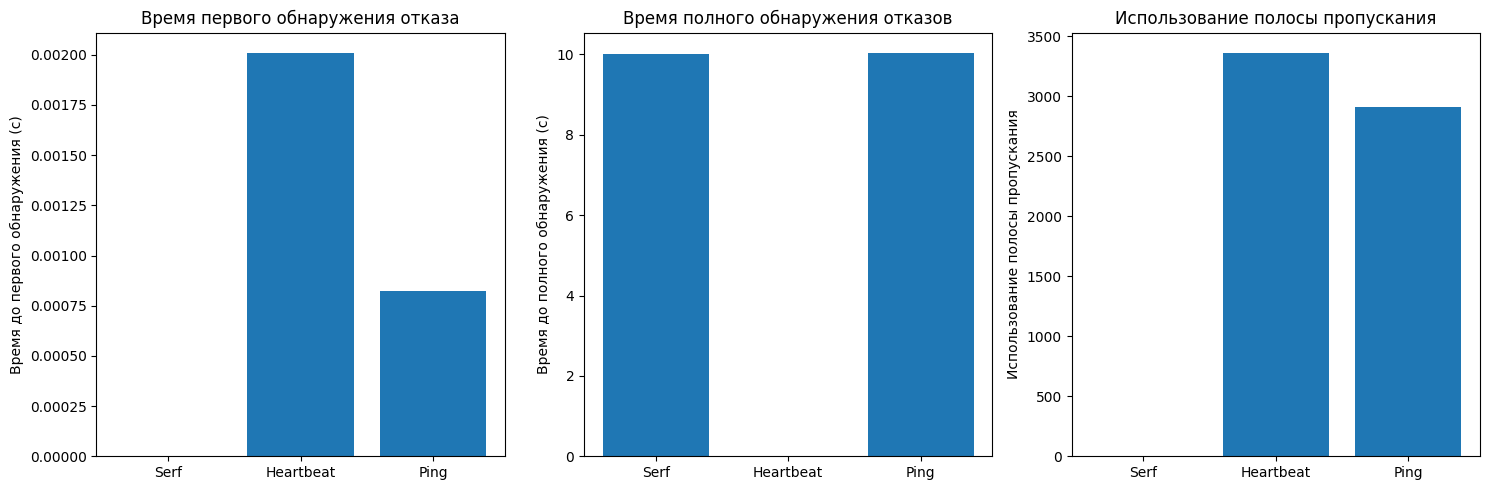

Результаты симуляции:

Serf:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.02 с
Использование полосы пропускания: 0 (условных единиц)

Heartbeat:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 0.00 с
Использование полосы пропускания: 3363 (условных единиц)

Ping:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.04 с
Использование полосы пропускания: 2907 (условных единиц)


In [56]:
import random
import time
import matplotlib.pyplot as plt

class Node:
  def __init__(self, node_id):
    self.id = node_id
    self.knows_failure = False

class BaseSimulator:
  def __init__(self, num_nodes, interval, node_failures):
    self.nodes = [Node(i) for i in range(num_nodes)]
    self.interval = interval
    self.node_failures = node_failures
    self.failed_nodes = set()
    self.bandwidth_usage = 0
  def simulate_failure(self):
    num_failures = int(len(self.nodes) * self.node_failures / 100)
    self.failed_nodes = set(random.sample(range(len(self.nodes)), num_failures))
    if self.failed_nodes:
      self.nodes[random.choice(list(self.failed_nodes))].knows_failure = True
    elif self.nodes:
      self.nodes[0].knows_failure = True

  def run_simulation(self):
    self.simulate_failure()
    start_time = time.time()
    first_knowledge_time = None
    all_knowledge_time = None

    while True:
      self.detect_failures()
      current_time = time.time() - start_time

      if first_knowledge_time is None and any(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        first_knowledge_time = current_time

      if all(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        all_knowledge_time = current_time
        break

      if current_time > 10: # Ограничение времени симуляции
        break

      time.sleep(self.interval)

    return first_knowledge_time or 0, all_knowledge_time or current_time, self.bandwidth_usage

class SerfSimulator(BaseSimulator):
  def __init__(self, num_nodes, gossip_interval, gossip_fanout, packet_loss, node_failures):
    super().__init__(num_nodes, gossip_interval, node_failures)
    self.gossip_fanout = gossip_fanout
    self.packet_loss = packet_loss
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes and node.knows_failure:
        active_nodes = [n for n in range(len(self.nodes)) if n != node.id and n not in self.failed_nodes]
        targets = random.sample(active_nodes, min(self.gossip_fanout, len(active_nodes))) if active_nodes else []
        for target in targets:
          if random.random() > self.packet_loss / 100:
            self.nodes[target].knows_failure = True
            self.bandwidth_usage += 1

class HeartbeatSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        for other_node in self.nodes:
          if other_node.id != node.id:
            if other_node.id in self.failed_nodes:
              node.knows_failure = True
            self.bandwidth_usage += 1

class PingSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        target = random.choice([n for n in range(len(self.nodes)) if n != node.id])
        if target in self.failed_nodes:
          node.knows_failure = True
        self.bandwidth_usage += 1

def run_comparison(num_nodes, node_failures):
  serf_sim = SerfSimulator(num_nodes, 0.2, 3, 0, node_failures)
  heartbeat_sim = HeartbeatSimulator(num_nodes, 0.2, node_failures)
  ping_sim = PingSimulator(num_nodes, 0.2, node_failures)
  serf_result = serf_sim.run_simulation()
  heartbeat_result = heartbeat_sim.run_simulation()
  ping_result = ping_sim.run_simulation()
  return serf_result, heartbeat_result, ping_result

def plot_comparison(results):
 protocols = ['Serf', 'Heartbeat', 'Ping']
 first_times = [r[0] for r in results]
 all_times = [r[1] for r in results]
 bandwidths = [r[2] for r in results]
 fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
 ax1.bar(protocols, first_times)
 ax1.set_ylabel('Время до первого обнаружения (с)')
 ax1.set_title('Время первого обнаружения отказа')
 ax2.bar(protocols, all_times)
 ax2.set_ylabel('Время до полного обнаружения (с)')
 ax2.set_title('Время полного обнаружения отказов')
 ax3.bar(protocols, bandwidths)
 ax3.set_ylabel('Использование полосы пропускания')
 ax3.set_title('Использование полосы пропускания')
 plt.tight_layout()
 plt.show()

# Запуск сравнения
num_nodes = 60
node_failures = 5 # 5% узлов отказывают

results = run_comparison(num_nodes, node_failures)
plot_comparison(results)
print("Результаты симуляции:")
for protocol, result in zip(['Serf', 'Heartbeat', 'Ping'], results):
  print(f"\n{protocol}:")
  print(f"Время до 'Хотя бы один узел знает': {result[0]:.2f} с")
  print(f"Время до 'Все живые узлы знают': {result[1]:.2f} с")
  print(f"Использование полосы пропускания: {result[2]} (условных единиц)")

# nodes = 70

In [33]:
#Ширина полосы пропускания
import math
def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,packet_loss, node_failures):
# Константы
  PACKET_SIZE = 1024 # байт
  OVERHEAD = 1.2 # 20% накладных расходов
# Расчет активных узлов
  active_nodes = nodes * (1 - node_failures)
# Расчет количества сообщений в секунду
  messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
# Учет потери пакетов
  effective_messages = messages_per_second * (1 - packet_loss)
# Расчет общего объема данных в секунду
  data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
# Перевод в биты в секунду
  bandwidth_bps = data_per_second * 8
  return bandwidth_bps
 # Входные данные:
# 1. gossip_intervals - список интервалов gossip в секундах
# Тип: список float
# Описание: Определяет, как часто узлы обмениваются информацией
gossip_intervals = [0.2]
# 2. gossip_fanout - количество узлов, которым отправляется
#сообщение за один раунд
# Тип: int
# Описание: Определяет, скольким соседям узел отправляет
#обновления за один раунд gossip
gossip_fanout = 3
# 3. nodes - общее количество узлов в сети
# Тип: int
# Описание: Представляет размер сети
nodes = 70
# 4. packet_loss - процент потери пакетов
# Тип: float (0-1)
# Описание: Определяет долю пакетов, которые не достигают цели
packet_loss = 0.05
# 5. node_failures - процент отказов узлов
# Тип: float (0-1)
# Описание: Определяет долю узлов, которые не функционируют в
#данный момент
node_failures = 0.05
# Расчет и вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с)")
print("-" * 50)
for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  print(f"{interval:^17} | {bandwidth:,.2f}")
# Расчет средней ширины полосы пропускания
average_bandwidth = sum(calculate_bandwidth(interval, gossip_fanout,
nodes, packet_loss, node_failures)
      for interval in gossip_intervals) /len(gossip_intervals)
print("-" * 50)
print(f"Средняя ширина полосы пропускания: {average_bandwidth:,.2f} бит/с")

Gossip Interval (с) | Ширина полосы пропускания (бит/с)
--------------------------------------------------
       0.2        | 9,315,532.80
--------------------------------------------------
Средняя ширина полосы пропускания: 9,315,532.80 бит/с


In [47]:
import math
import random

def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,
packet_loss, node_failures):
 PACKET_SIZE = 1024 # байт
 OVERHEAD = 1.2 # 20% накладных расходов

 active_nodes = nodes * (1 - node_failures)
 messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
 effective_messages = messages_per_second * (1 - packet_loss)
 data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
 bandwidth_bps = data_per_second * 8

 return bandwidth_bps

def estimate_convergence_time(gossip_interval, gossip_fanout, nodes, node_failures):
 active_nodes = nodes * (1 - node_failures)
 infection_rate = gossip_fanout / active_nodes
 rounds_to_infect_99_percent = math.ceil(math.log(0.01) / math.log(1 - infection_rate))
 convergence_time = rounds_to_infect_99_percent * gossip_interval
 return convergence_time

def run_simulation(gossip_intervals, gossip_fanout, nodes, packet_loss, node_failures):
 results = []
 for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  convergence_time = estimate_convergence_time(interval, gossip_fanout, nodes, node_failures)
  results.append((interval, bandwidth, convergence_time))
 return results

# Входные данные
gossip_intervals = [0.2, 0.2]
gossip_fanout = 3
nodes = 70
packet_loss = 0.05
node_failures = 0.05
# Запуск симуляции
results = run_simulation(gossip_intervals, gossip_fanout, nodes,
packet_loss, node_failures)
# Вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)")
print("-" * 80)
for interval, bandwidth, convergence_time in results:
 print(f"{interval:^17} | {bandwidth:^33,.2f} | {convergence_time:^21,.2f}")
# Анализ результатов
print("\nАнализ результатов:")
print("1. Влияние Gossip Interval на использование полосы пропускания:")
for i in range(len(results) - 1):
 bandwidth_change = (results[i+1][1] - results[i][1]) / results[i][1] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, использование полосы пропускания изменяется на {bandwidth_change:.2f}%")
print("\n2. Влияние Gossip Interval на время конвергенции:")
for i in range(len(results) - 1):
 convergence_change = (results[i+1][2] - results[i][2]) / results[i][2] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, время конвергенции изменяется на {convergence_change:.2f}%")

Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)
--------------------------------------------------------------------------------
       0.2        |           9,315,532.80            |         20.00        
       0.2        |           9,315,532.80            |         20.00        

Анализ результатов:
1. Влияние Gossip Interval на использование полосы пропускания:
 При увеличении интервала с 0.2 до 0.2 с, использование полосы пропускания изменяется на 0.00%

2. Влияние Gossip Interval на время конвергенции:
 При увеличении интервала с 0.2 до 0.2 с, время конвергенции изменяется на 0.00%


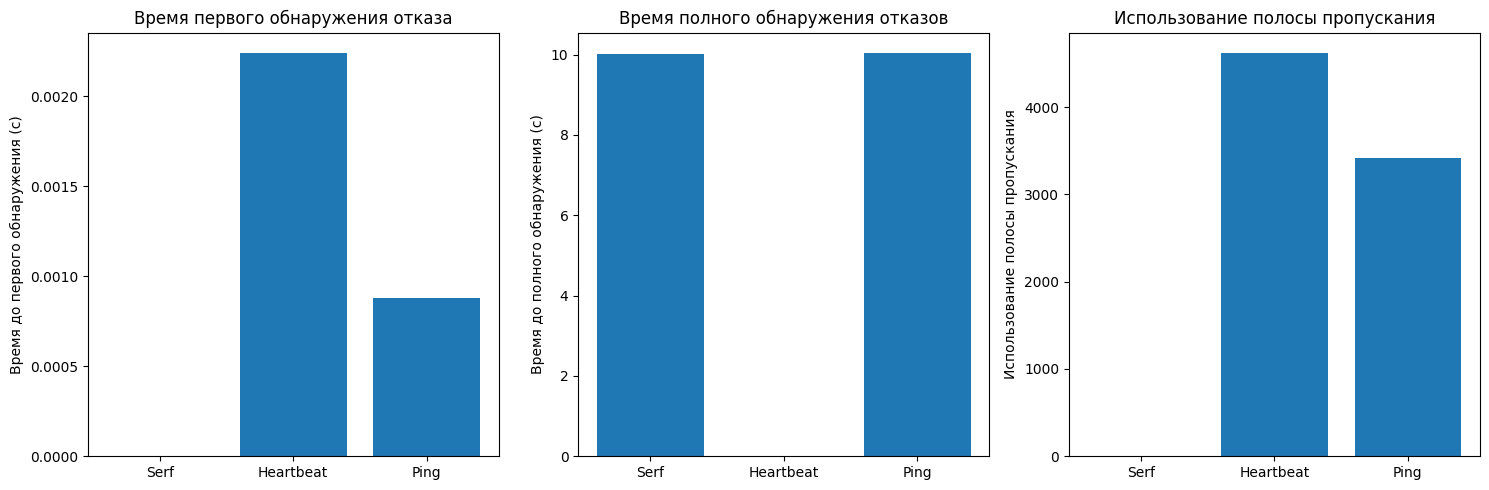

Результаты симуляции:

Serf:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.02 с
Использование полосы пропускания: 0 (условных единиц)

Heartbeat:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 0.00 с
Использование полосы пропускания: 4623 (условных единиц)

Ping:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.04 с
Использование полосы пропускания: 3417 (условных единиц)


In [57]:
import random
import time
import matplotlib.pyplot as plt

class Node:
  def __init__(self, node_id):
    self.id = node_id
    self.knows_failure = False

class BaseSimulator:
  def __init__(self, num_nodes, interval, node_failures):
    self.nodes = [Node(i) for i in range(num_nodes)]
    self.interval = interval
    self.node_failures = node_failures
    self.failed_nodes = set()
    self.bandwidth_usage = 0
  def simulate_failure(self):
    num_failures = int(len(self.nodes) * self.node_failures / 100)
    self.failed_nodes = set(random.sample(range(len(self.nodes)), num_failures))
    if self.failed_nodes:
      self.nodes[random.choice(list(self.failed_nodes))].knows_failure = True
    elif self.nodes:
      self.nodes[0].knows_failure = True

  def run_simulation(self):
    self.simulate_failure()
    start_time = time.time()
    first_knowledge_time = None
    all_knowledge_time = None

    while True:
      self.detect_failures()
      current_time = time.time() - start_time

      if first_knowledge_time is None and any(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        first_knowledge_time = current_time

      if all(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        all_knowledge_time = current_time
        break

      if current_time > 10: # Ограничение времени симуляции
        break

      time.sleep(self.interval)

    return first_knowledge_time or 0, all_knowledge_time or current_time, self.bandwidth_usage

class SerfSimulator(BaseSimulator):
  def __init__(self, num_nodes, gossip_interval, gossip_fanout, packet_loss, node_failures):
    super().__init__(num_nodes, gossip_interval, node_failures)
    self.gossip_fanout = gossip_fanout
    self.packet_loss = packet_loss
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes and node.knows_failure:
        active_nodes = [n for n in range(len(self.nodes)) if n != node.id and n not in self.failed_nodes]
        targets = random.sample(active_nodes, min(self.gossip_fanout, len(active_nodes))) if active_nodes else []
        for target in targets:
          if random.random() > self.packet_loss / 100:
            self.nodes[target].knows_failure = True
            self.bandwidth_usage += 1

class HeartbeatSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        for other_node in self.nodes:
          if other_node.id != node.id:
            if other_node.id in self.failed_nodes:
              node.knows_failure = True
            self.bandwidth_usage += 1

class PingSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        target = random.choice([n for n in range(len(self.nodes)) if n != node.id])
        if target in self.failed_nodes:
          node.knows_failure = True
        self.bandwidth_usage += 1

def run_comparison(num_nodes, node_failures):
  serf_sim = SerfSimulator(num_nodes, 0.2, 3, 0, node_failures)
  heartbeat_sim = HeartbeatSimulator(num_nodes, 0.2, node_failures)
  ping_sim = PingSimulator(num_nodes, 0.2, node_failures)
  serf_result = serf_sim.run_simulation()
  heartbeat_result = heartbeat_sim.run_simulation()
  ping_result = ping_sim.run_simulation()
  return serf_result, heartbeat_result, ping_result

def plot_comparison(results):
 protocols = ['Serf', 'Heartbeat', 'Ping']
 first_times = [r[0] for r in results]
 all_times = [r[1] for r in results]
 bandwidths = [r[2] for r in results]
 fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
 ax1.bar(protocols, first_times)
 ax1.set_ylabel('Время до первого обнаружения (с)')
 ax1.set_title('Время первого обнаружения отказа')
 ax2.bar(protocols, all_times)
 ax2.set_ylabel('Время до полного обнаружения (с)')
 ax2.set_title('Время полного обнаружения отказов')
 ax3.bar(protocols, bandwidths)
 ax3.set_ylabel('Использование полосы пропускания')
 ax3.set_title('Использование полосы пропускания')
 plt.tight_layout()
 plt.show()

# Запуск сравнения
num_nodes = 70
node_failures = 5 # 5% узлов отказывают

results = run_comparison(num_nodes, node_failures)
plot_comparison(results)
print("Результаты симуляции:")
for protocol, result in zip(['Serf', 'Heartbeat', 'Ping'], results):
  print(f"\n{protocol}:")
  print(f"Время до 'Хотя бы один узел знает': {result[0]:.2f} с")
  print(f"Время до 'Все живые узлы знают': {result[1]:.2f} с")
  print(f"Использование полосы пропускания: {result[2]} (условных единиц)")

# nodes = 80

In [34]:
#Ширина полосы пропускания
import math
def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,packet_loss, node_failures):
# Константы
  PACKET_SIZE = 1024 # байт
  OVERHEAD = 1.2 # 20% накладных расходов
# Расчет активных узлов
  active_nodes = nodes * (1 - node_failures)
# Расчет количества сообщений в секунду
  messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
# Учет потери пакетов
  effective_messages = messages_per_second * (1 - packet_loss)
# Расчет общего объема данных в секунду
  data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
# Перевод в биты в секунду
  bandwidth_bps = data_per_second * 8
  return bandwidth_bps
 # Входные данные:
# 1. gossip_intervals - список интервалов gossip в секундах
# Тип: список float
# Описание: Определяет, как часто узлы обмениваются информацией
gossip_intervals = [0.2]
# 2. gossip_fanout - количество узлов, которым отправляется
#сообщение за один раунд
# Тип: int
# Описание: Определяет, скольким соседям узел отправляет
#обновления за один раунд gossip
gossip_fanout = 3
# 3. nodes - общее количество узлов в сети
# Тип: int
# Описание: Представляет размер сети
nodes = 80
# 4. packet_loss - процент потери пакетов
# Тип: float (0-1)
# Описание: Определяет долю пакетов, которые не достигают цели
packet_loss = 0.05
# 5. node_failures - процент отказов узлов
# Тип: float (0-1)
# Описание: Определяет долю узлов, которые не функционируют в
#данный момент
node_failures = 0.05
# Расчет и вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с)")
print("-" * 50)
for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  print(f"{interval:^17} | {bandwidth:,.2f}")
# Расчет средней ширины полосы пропускания
average_bandwidth = sum(calculate_bandwidth(interval, gossip_fanout,
nodes, packet_loss, node_failures)
      for interval in gossip_intervals) /len(gossip_intervals)
print("-" * 50)
print(f"Средняя ширина полосы пропускания: {average_bandwidth:,.2f} бит/с")

Gossip Interval (с) | Ширина полосы пропускания (бит/с)
--------------------------------------------------
       0.2        | 10,646,323.20
--------------------------------------------------
Средняя ширина полосы пропускания: 10,646,323.20 бит/с


In [49]:
import math
import random

def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,
packet_loss, node_failures):
 PACKET_SIZE = 1024 # байт
 OVERHEAD = 1.2 # 20% накладных расходов

 active_nodes = nodes * (1 - node_failures)
 messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
 effective_messages = messages_per_second * (1 - packet_loss)
 data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
 bandwidth_bps = data_per_second * 8

 return bandwidth_bps

def estimate_convergence_time(gossip_interval, gossip_fanout, nodes, node_failures):
 active_nodes = nodes * (1 - node_failures)
 infection_rate = gossip_fanout / active_nodes
 rounds_to_infect_99_percent = math.ceil(math.log(0.01) / math.log(1 - infection_rate))
 convergence_time = rounds_to_infect_99_percent * gossip_interval
 return convergence_time

def run_simulation(gossip_intervals, gossip_fanout, nodes, packet_loss, node_failures):
 results = []
 for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  convergence_time = estimate_convergence_time(interval, gossip_fanout, nodes, node_failures)
  results.append((interval, bandwidth, convergence_time))
 return results

# Входные данные
gossip_intervals = [0.2, 0.2]
gossip_fanout = 3
nodes = 80
packet_loss = 0.05
node_failures = 0.05
# Запуск симуляции
results = run_simulation(gossip_intervals, gossip_fanout, nodes,
packet_loss, node_failures)
# Вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)")
print("-" * 80)
for interval, bandwidth, convergence_time in results:
 print(f"{interval:^17} | {bandwidth:^33,.2f} | {convergence_time:^21,.2f}")
# Анализ результатов
print("\nАнализ результатов:")
print("1. Влияние Gossip Interval на использование полосы пропускания:")
for i in range(len(results) - 1):
 bandwidth_change = (results[i+1][1] - results[i][1]) / results[i][1] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, использование полосы пропускания изменяется на {bandwidth_change:.2f}%")
print("\n2. Влияние Gossip Interval на время конвергенции:")
for i in range(len(results) - 1):
 convergence_change = (results[i+1][2] - results[i][2]) / results[i][2] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, время конвергенции изменяется на {convergence_change:.2f}%")

Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)
--------------------------------------------------------------------------------
       0.2        |           10,646,323.20           |         23.00        
       0.2        |           10,646,323.20           |         23.00        

Анализ результатов:
1. Влияние Gossip Interval на использование полосы пропускания:
 При увеличении интервала с 0.2 до 0.2 с, использование полосы пропускания изменяется на 0.00%

2. Влияние Gossip Interval на время конвергенции:
 При увеличении интервала с 0.2 до 0.2 с, время конвергенции изменяется на 0.00%


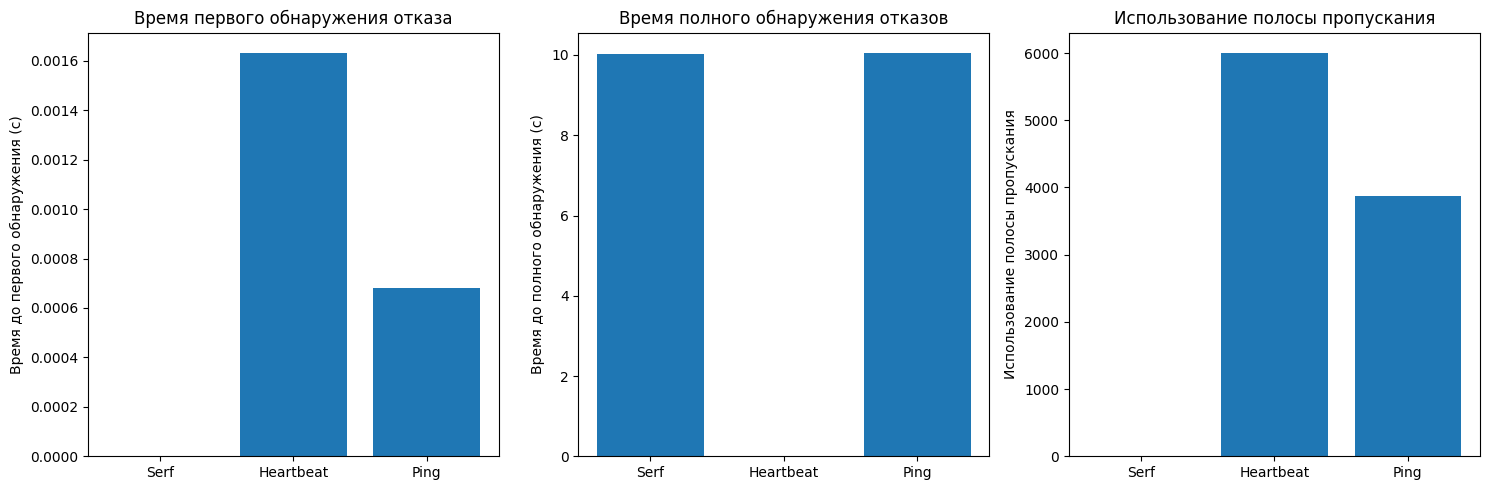

Результаты симуляции:

Serf:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.02 с
Использование полосы пропускания: 0 (условных единиц)

Heartbeat:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 0.00 с
Использование полосы пропускания: 6004 (условных единиц)

Ping:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.06 с
Использование полосы пропускания: 3876 (условных единиц)


In [58]:
import random
import time
import matplotlib.pyplot as plt

class Node:
  def __init__(self, node_id):
    self.id = node_id
    self.knows_failure = False

class BaseSimulator:
  def __init__(self, num_nodes, interval, node_failures):
    self.nodes = [Node(i) for i in range(num_nodes)]
    self.interval = interval
    self.node_failures = node_failures
    self.failed_nodes = set()
    self.bandwidth_usage = 0
  def simulate_failure(self):
    num_failures = int(len(self.nodes) * self.node_failures / 100)
    self.failed_nodes = set(random.sample(range(len(self.nodes)), num_failures))
    if self.failed_nodes:
      self.nodes[random.choice(list(self.failed_nodes))].knows_failure = True
    elif self.nodes:
      self.nodes[0].knows_failure = True

  def run_simulation(self):
    self.simulate_failure()
    start_time = time.time()
    first_knowledge_time = None
    all_knowledge_time = None

    while True:
      self.detect_failures()
      current_time = time.time() - start_time

      if first_knowledge_time is None and any(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        first_knowledge_time = current_time

      if all(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        all_knowledge_time = current_time
        break

      if current_time > 10: # Ограничение времени симуляции
        break

      time.sleep(self.interval)

    return first_knowledge_time or 0, all_knowledge_time or current_time, self.bandwidth_usage

class SerfSimulator(BaseSimulator):
  def __init__(self, num_nodes, gossip_interval, gossip_fanout, packet_loss, node_failures):
    super().__init__(num_nodes, gossip_interval, node_failures)
    self.gossip_fanout = gossip_fanout
    self.packet_loss = packet_loss
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes and node.knows_failure:
        active_nodes = [n for n in range(len(self.nodes)) if n != node.id and n not in self.failed_nodes]
        targets = random.sample(active_nodes, min(self.gossip_fanout, len(active_nodes))) if active_nodes else []
        for target in targets:
          if random.random() > self.packet_loss / 100:
            self.nodes[target].knows_failure = True
            self.bandwidth_usage += 1

class HeartbeatSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        for other_node in self.nodes:
          if other_node.id != node.id:
            if other_node.id in self.failed_nodes:
              node.knows_failure = True
            self.bandwidth_usage += 1

class PingSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        target = random.choice([n for n in range(len(self.nodes)) if n != node.id])
        if target in self.failed_nodes:
          node.knows_failure = True
        self.bandwidth_usage += 1

def run_comparison(num_nodes, node_failures):
  serf_sim = SerfSimulator(num_nodes, 0.2, 3, 0, node_failures)
  heartbeat_sim = HeartbeatSimulator(num_nodes, 0.2, node_failures)
  ping_sim = PingSimulator(num_nodes, 0.2, node_failures)
  serf_result = serf_sim.run_simulation()
  heartbeat_result = heartbeat_sim.run_simulation()
  ping_result = ping_sim.run_simulation()
  return serf_result, heartbeat_result, ping_result

def plot_comparison(results):
 protocols = ['Serf', 'Heartbeat', 'Ping']
 first_times = [r[0] for r in results]
 all_times = [r[1] for r in results]
 bandwidths = [r[2] for r in results]
 fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
 ax1.bar(protocols, first_times)
 ax1.set_ylabel('Время до первого обнаружения (с)')
 ax1.set_title('Время первого обнаружения отказа')
 ax2.bar(protocols, all_times)
 ax2.set_ylabel('Время до полного обнаружения (с)')
 ax2.set_title('Время полного обнаружения отказов')
 ax3.bar(protocols, bandwidths)
 ax3.set_ylabel('Использование полосы пропускания')
 ax3.set_title('Использование полосы пропускания')
 plt.tight_layout()
 plt.show()

# Запуск сравнения
num_nodes = 80
node_failures = 5 # 5% узлов отказывают

results = run_comparison(num_nodes, node_failures)
plot_comparison(results)
print("Результаты симуляции:")
for protocol, result in zip(['Serf', 'Heartbeat', 'Ping'], results):
  print(f"\n{protocol}:")
  print(f"Время до 'Хотя бы один узел знает': {result[0]:.2f} с")
  print(f"Время до 'Все живые узлы знают': {result[1]:.2f} с")
  print(f"Использование полосы пропускания: {result[2]} (условных единиц)")

# nodes = 90

In [35]:
#Ширина полосы пропускания
import math
def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,packet_loss, node_failures):
# Константы
  PACKET_SIZE = 1024 # байт
  OVERHEAD = 1.2 # 20% накладных расходов
# Расчет активных узлов
  active_nodes = nodes * (1 - node_failures)
# Расчет количества сообщений в секунду
  messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
# Учет потери пакетов
  effective_messages = messages_per_second * (1 - packet_loss)
# Расчет общего объема данных в секунду
  data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
# Перевод в биты в секунду
  bandwidth_bps = data_per_second * 8
  return bandwidth_bps
 # Входные данные:
# 1. gossip_intervals - список интервалов gossip в секундах
# Тип: список float
# Описание: Определяет, как часто узлы обмениваются информацией
gossip_intervals = [0.2]
# 2. gossip_fanout - количество узлов, которым отправляется
#сообщение за один раунд
# Тип: int
# Описание: Определяет, скольким соседям узел отправляет
#обновления за один раунд gossip
gossip_fanout = 3
# 3. nodes - общее количество узлов в сети
# Тип: int
# Описание: Представляет размер сети
nodes = 90
# 4. packet_loss - процент потери пакетов
# Тип: float (0-1)
# Описание: Определяет долю пакетов, которые не достигают цели
packet_loss = 0.05
# 5. node_failures - процент отказов узлов
# Тип: float (0-1)
# Описание: Определяет долю узлов, которые не функционируют в
#данный момент
node_failures = 0.05
# Расчет и вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с)")
print("-" * 50)
for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  print(f"{interval:^17} | {bandwidth:,.2f}")
# Расчет средней ширины полосы пропускания
average_bandwidth = sum(calculate_bandwidth(interval, gossip_fanout,
nodes, packet_loss, node_failures)
      for interval in gossip_intervals) /len(gossip_intervals)
print("-" * 50)
print(f"Средняя ширина полосы пропускания: {average_bandwidth:,.2f} бит/с")

Gossip Interval (с) | Ширина полосы пропускания (бит/с)
--------------------------------------------------
       0.2        | 11,977,113.60
--------------------------------------------------
Средняя ширина полосы пропускания: 11,977,113.60 бит/с


In [50]:
import math
import random

def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,
packet_loss, node_failures):
 PACKET_SIZE = 1024 # байт
 OVERHEAD = 1.2 # 20% накладных расходов

 active_nodes = nodes * (1 - node_failures)
 messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
 effective_messages = messages_per_second * (1 - packet_loss)
 data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
 bandwidth_bps = data_per_second * 8

 return bandwidth_bps

def estimate_convergence_time(gossip_interval, gossip_fanout, nodes, node_failures):
 active_nodes = nodes * (1 - node_failures)
 infection_rate = gossip_fanout / active_nodes
 rounds_to_infect_99_percent = math.ceil(math.log(0.01) / math.log(1 - infection_rate))
 convergence_time = rounds_to_infect_99_percent * gossip_interval
 return convergence_time

def run_simulation(gossip_intervals, gossip_fanout, nodes, packet_loss, node_failures):
 results = []
 for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  convergence_time = estimate_convergence_time(interval, gossip_fanout, nodes, node_failures)
  results.append((interval, bandwidth, convergence_time))
 return results

# Входные данные
gossip_intervals = [0.2, 0.2]
gossip_fanout = 3
nodes = 90
packet_loss = 0.05
node_failures = 0.05
# Запуск симуляции
results = run_simulation(gossip_intervals, gossip_fanout, nodes,
packet_loss, node_failures)
# Вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)")
print("-" * 80)
for interval, bandwidth, convergence_time in results:
 print(f"{interval:^17} | {bandwidth:^33,.2f} | {convergence_time:^21,.2f}")
# Анализ результатов
print("\nАнализ результатов:")
print("1. Влияние Gossip Interval на использование полосы пропускания:")
for i in range(len(results) - 1):
 bandwidth_change = (results[i+1][1] - results[i][1]) / results[i][1] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, использование полосы пропускания изменяется на {bandwidth_change:.2f}%")
print("\n2. Влияние Gossip Interval на время конвергенции:")
for i in range(len(results) - 1):
 convergence_change = (results[i+1][2] - results[i][2]) / results[i][2] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, время конвергенции изменяется на {convergence_change:.2f}%")

Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)
--------------------------------------------------------------------------------
       0.2        |           11,977,113.60           |         25.80        
       0.2        |           11,977,113.60           |         25.80        

Анализ результатов:
1. Влияние Gossip Interval на использование полосы пропускания:
 При увеличении интервала с 0.2 до 0.2 с, использование полосы пропускания изменяется на 0.00%

2. Влияние Gossip Interval на время конвергенции:
 При увеличении интервала с 0.2 до 0.2 с, время конвергенции изменяется на 0.00%


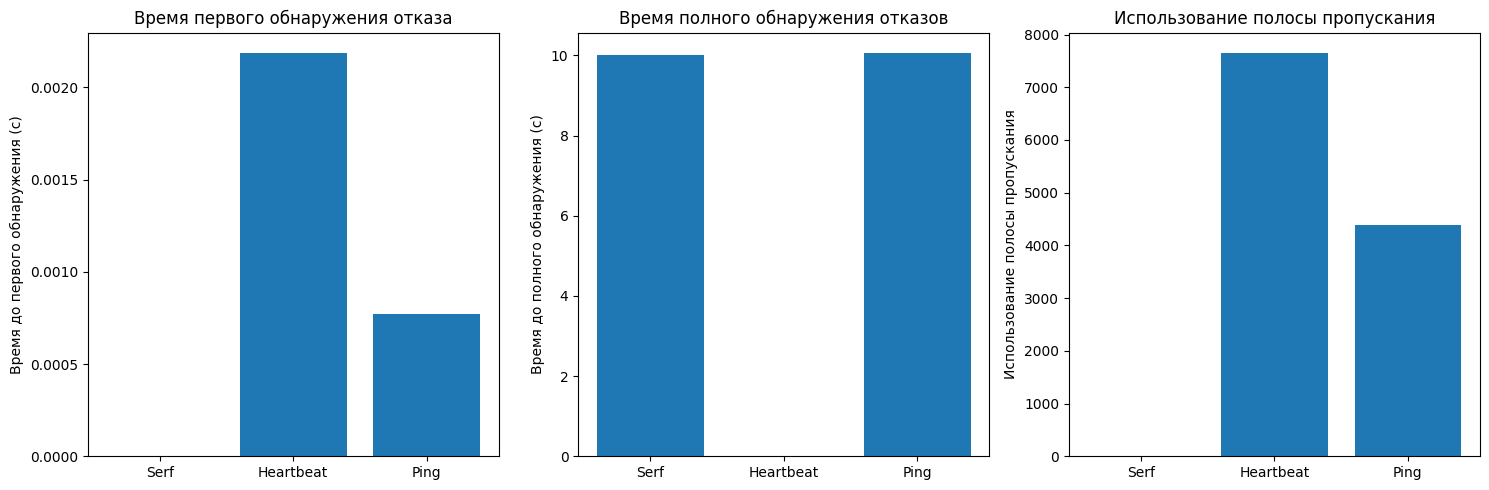

Результаты симуляции:

Serf:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.02 с
Использование полосы пропускания: 0 (условных единиц)

Heartbeat:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 0.00 с
Использование полосы пропускания: 7654 (условных единиц)

Ping:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.07 с
Использование полосы пропускания: 4386 (условных единиц)


In [59]:
import random
import time
import matplotlib.pyplot as plt

class Node:
  def __init__(self, node_id):
    self.id = node_id
    self.knows_failure = False

class BaseSimulator:
  def __init__(self, num_nodes, interval, node_failures):
    self.nodes = [Node(i) for i in range(num_nodes)]
    self.interval = interval
    self.node_failures = node_failures
    self.failed_nodes = set()
    self.bandwidth_usage = 0
  def simulate_failure(self):
    num_failures = int(len(self.nodes) * self.node_failures / 100)
    self.failed_nodes = set(random.sample(range(len(self.nodes)), num_failures))
    if self.failed_nodes:
      self.nodes[random.choice(list(self.failed_nodes))].knows_failure = True
    elif self.nodes:
      self.nodes[0].knows_failure = True

  def run_simulation(self):
    self.simulate_failure()
    start_time = time.time()
    first_knowledge_time = None
    all_knowledge_time = None

    while True:
      self.detect_failures()
      current_time = time.time() - start_time

      if first_knowledge_time is None and any(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        first_knowledge_time = current_time

      if all(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        all_knowledge_time = current_time
        break

      if current_time > 10: # Ограничение времени симуляции
        break

      time.sleep(self.interval)

    return first_knowledge_time or 0, all_knowledge_time or current_time, self.bandwidth_usage

class SerfSimulator(BaseSimulator):
  def __init__(self, num_nodes, gossip_interval, gossip_fanout, packet_loss, node_failures):
    super().__init__(num_nodes, gossip_interval, node_failures)
    self.gossip_fanout = gossip_fanout
    self.packet_loss = packet_loss
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes and node.knows_failure:
        active_nodes = [n for n in range(len(self.nodes)) if n != node.id and n not in self.failed_nodes]
        targets = random.sample(active_nodes, min(self.gossip_fanout, len(active_nodes))) if active_nodes else []
        for target in targets:
          if random.random() > self.packet_loss / 100:
            self.nodes[target].knows_failure = True
            self.bandwidth_usage += 1

class HeartbeatSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        for other_node in self.nodes:
          if other_node.id != node.id:
            if other_node.id in self.failed_nodes:
              node.knows_failure = True
            self.bandwidth_usage += 1

class PingSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        target = random.choice([n for n in range(len(self.nodes)) if n != node.id])
        if target in self.failed_nodes:
          node.knows_failure = True
        self.bandwidth_usage += 1

def run_comparison(num_nodes, node_failures):
  serf_sim = SerfSimulator(num_nodes, 0.2, 3, 0, node_failures)
  heartbeat_sim = HeartbeatSimulator(num_nodes, 0.2, node_failures)
  ping_sim = PingSimulator(num_nodes, 0.2, node_failures)
  serf_result = serf_sim.run_simulation()
  heartbeat_result = heartbeat_sim.run_simulation()
  ping_result = ping_sim.run_simulation()
  return serf_result, heartbeat_result, ping_result

def plot_comparison(results):
 protocols = ['Serf', 'Heartbeat', 'Ping']
 first_times = [r[0] for r in results]
 all_times = [r[1] for r in results]
 bandwidths = [r[2] for r in results]
 fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
 ax1.bar(protocols, first_times)
 ax1.set_ylabel('Время до первого обнаружения (с)')
 ax1.set_title('Время первого обнаружения отказа')
 ax2.bar(protocols, all_times)
 ax2.set_ylabel('Время до полного обнаружения (с)')
 ax2.set_title('Время полного обнаружения отказов')
 ax3.bar(protocols, bandwidths)
 ax3.set_ylabel('Использование полосы пропускания')
 ax3.set_title('Использование полосы пропускания')
 plt.tight_layout()
 plt.show()

# Запуск сравнения
num_nodes = 90
node_failures = 5 # 5% узлов отказывают

results = run_comparison(num_nodes, node_failures)
plot_comparison(results)
print("Результаты симуляции:")
for protocol, result in zip(['Serf', 'Heartbeat', 'Ping'], results):
  print(f"\n{protocol}:")
  print(f"Время до 'Хотя бы один узел знает': {result[0]:.2f} с")
  print(f"Время до 'Все живые узлы знают': {result[1]:.2f} с")
  print(f"Использование полосы пропускания: {result[2]} (условных единиц)")

# nodes = 100

In [52]:
#Ширина полосы пропускания
import math
def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,packet_loss, node_failures):
# Константы
  PACKET_SIZE = 1024 # байт
  OVERHEAD = 1.2 # 20% накладных расходов
# Расчет активных узлов
  active_nodes = nodes * (1 - node_failures)
# Расчет количества сообщений в секунду
  messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
# Учет потери пакетов
  effective_messages = messages_per_second * (1 - packet_loss)
# Расчет общего объема данных в секунду
  data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
# Перевод в биты в секунду
  bandwidth_bps = data_per_second * 8
  return bandwidth_bps
 # Входные данные:
# 1. gossip_intervals - список интервалов gossip в секундах
# Тип: список float
# Описание: Определяет, как часто узлы обмениваются информацией
gossip_intervals = [0.2]
# 2. gossip_fanout - количество узлов, которым отправляется
#сообщение за один раунд
# Тип: int
# Описание: Определяет, скольким соседям узел отправляет
#обновления за один раунд gossip
gossip_fanout = 3
# 3. nodes - общее количество узлов в сети
# Тип: int
# Описание: Представляет размер сети
nodes = 100
# 4. packet_loss - процент потери пакетов
# Тип: float (0-1)
# Описание: Определяет долю пакетов, которые не достигают цели
packet_loss = 0.05
# 5. node_failures - процент отказов узлов
# Тип: float (0-1)
# Описание: Определяет долю узлов, которые не функционируют в
#данный момент
node_failures = 0.05
# Расчет и вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с)")
print("-" * 50)
for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  print(f"{interval:^17} | {bandwidth:,.2f}")
# Расчет средней ширины полосы пропускания
average_bandwidth = sum(calculate_bandwidth(interval, gossip_fanout,
nodes, packet_loss, node_failures)
      for interval in gossip_intervals) /len(gossip_intervals)
print("-" * 50)
print(f"Средняя ширина полосы пропускания: {average_bandwidth:,.2f} бит/с")

Gossip Interval (с) | Ширина полосы пропускания (бит/с)
--------------------------------------------------
       0.2        | 13,307,904.00
--------------------------------------------------
Средняя ширина полосы пропускания: 13,307,904.00 бит/с


In [53]:
import math
import random

def calculate_bandwidth(gossip_interval, gossip_fanout, nodes,
packet_loss, node_failures):
 PACKET_SIZE = 1024 # байт
 OVERHEAD = 1.2 # 20% накладных расходов

 active_nodes = nodes * (1 - node_failures)
 messages_per_second = (1 / gossip_interval) * gossip_fanout * active_nodes
 effective_messages = messages_per_second * (1 - packet_loss)
 data_per_second = effective_messages * PACKET_SIZE * OVERHEAD
 bandwidth_bps = data_per_second * 8

 return bandwidth_bps

def estimate_convergence_time(gossip_interval, gossip_fanout, nodes, node_failures):
 active_nodes = nodes * (1 - node_failures)
 infection_rate = gossip_fanout / active_nodes
 rounds_to_infect_99_percent = math.ceil(math.log(0.01) / math.log(1 - infection_rate))
 convergence_time = rounds_to_infect_99_percent * gossip_interval
 return convergence_time

def run_simulation(gossip_intervals, gossip_fanout, nodes, packet_loss, node_failures):
 results = []
 for interval in gossip_intervals:
  bandwidth = calculate_bandwidth(interval, gossip_fanout, nodes, packet_loss, node_failures)
  convergence_time = estimate_convergence_time(interval, gossip_fanout, nodes, node_failures)
  results.append((interval, bandwidth, convergence_time))
 return results

# Входные данные
gossip_intervals = [0.2, 0.2]
gossip_fanout = 3
nodes = 100
packet_loss = 0.05
node_failures = 0.05
# Запуск симуляции
results = run_simulation(gossip_intervals, gossip_fanout, nodes,
packet_loss, node_failures)
# Вывод результатов
print("Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)")
print("-" * 80)
for interval, bandwidth, convergence_time in results:
 print(f"{interval:^17} | {bandwidth:^33,.2f} | {convergence_time:^21,.2f}")
# Анализ результатов
print("\nАнализ результатов:")
print("1. Влияние Gossip Interval на использование полосы пропускания:")
for i in range(len(results) - 1):
 bandwidth_change = (results[i+1][1] - results[i][1]) / results[i][1] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, использование полосы пропускания изменяется на {bandwidth_change:.2f}%")
print("\n2. Влияние Gossip Interval на время конвергенции:")
for i in range(len(results) - 1):
 convergence_change = (results[i+1][2] - results[i][2]) / results[i][2] * 100
print(f" При увеличении интервала с {results[i][0]} до {results[i+1][0]} с, время конвергенции изменяется на {convergence_change:.2f}%")

Gossip Interval (с) | Ширина полосы пропускания (бит/с) | Время конвергенции (с)
--------------------------------------------------------------------------------
       0.2        |           13,307,904.00           |         28.80        
       0.2        |           13,307,904.00           |         28.80        

Анализ результатов:
1. Влияние Gossip Interval на использование полосы пропускания:
 При увеличении интервала с 0.2 до 0.2 с, использование полосы пропускания изменяется на 0.00%

2. Влияние Gossip Interval на время конвергенции:
 При увеличении интервала с 0.2 до 0.2 с, время конвергенции изменяется на 0.00%


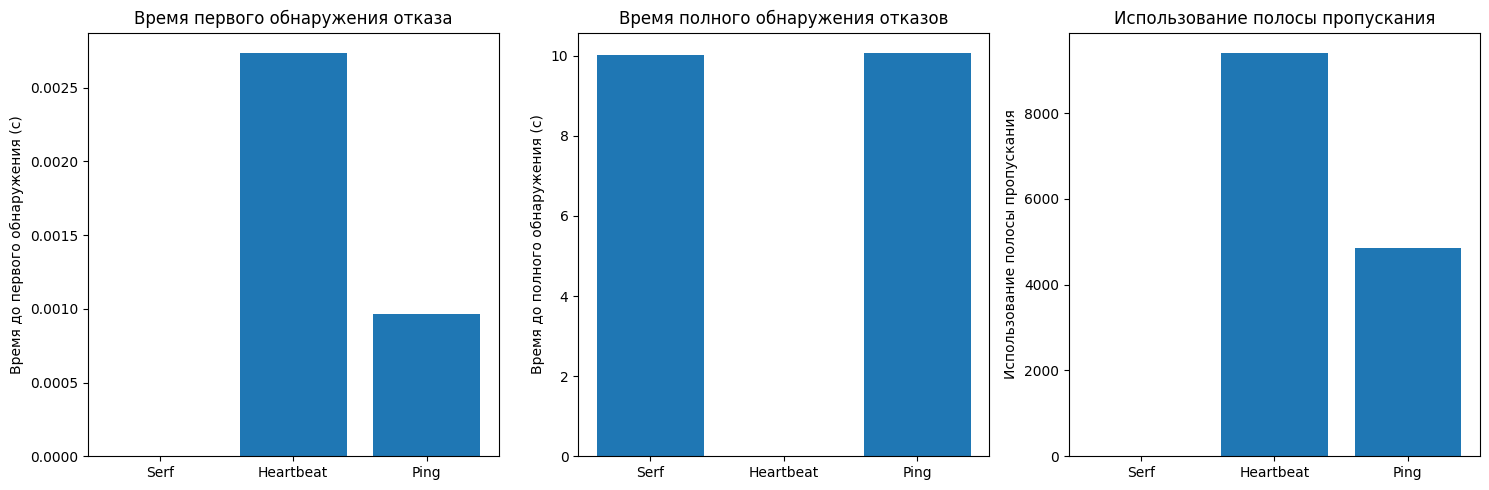

Результаты симуляции:

Serf:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.02 с
Использование полосы пропускания: 0 (условных единиц)

Heartbeat:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 0.00 с
Использование полосы пропускания: 9405 (условных единиц)

Ping:
Время до 'Хотя бы один узел знает': 0.00 с
Время до 'Все живые узлы знают': 10.07 с
Использование полосы пропускания: 4845 (условных единиц)


In [60]:
import random
import time
import matplotlib.pyplot as plt

class Node:
  def __init__(self, node_id):
    self.id = node_id
    self.knows_failure = False

class BaseSimulator:
  def __init__(self, num_nodes, interval, node_failures):
    self.nodes = [Node(i) for i in range(num_nodes)]
    self.interval = interval
    self.node_failures = node_failures
    self.failed_nodes = set()
    self.bandwidth_usage = 0
  def simulate_failure(self):
    num_failures = int(len(self.nodes) * self.node_failures / 100)
    self.failed_nodes = set(random.sample(range(len(self.nodes)), num_failures))
    if self.failed_nodes:
      self.nodes[random.choice(list(self.failed_nodes))].knows_failure = True
    elif self.nodes:
      self.nodes[0].knows_failure = True

  def run_simulation(self):
    self.simulate_failure()
    start_time = time.time()
    first_knowledge_time = None
    all_knowledge_time = None

    while True:
      self.detect_failures()
      current_time = time.time() - start_time

      if first_knowledge_time is None and any(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        first_knowledge_time = current_time

      if all(node.knows_failure for node in self.nodes if node.id not in self.failed_nodes):
        all_knowledge_time = current_time
        break

      if current_time > 10: # Ограничение времени симуляции
        break

      time.sleep(self.interval)

    return first_knowledge_time or 0, all_knowledge_time or current_time, self.bandwidth_usage

class SerfSimulator(BaseSimulator):
  def __init__(self, num_nodes, gossip_interval, gossip_fanout, packet_loss, node_failures):
    super().__init__(num_nodes, gossip_interval, node_failures)
    self.gossip_fanout = gossip_fanout
    self.packet_loss = packet_loss
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes and node.knows_failure:
        active_nodes = [n for n in range(len(self.nodes)) if n != node.id and n not in self.failed_nodes]
        targets = random.sample(active_nodes, min(self.gossip_fanout, len(active_nodes))) if active_nodes else []
        for target in targets:
          if random.random() > self.packet_loss / 100:
            self.nodes[target].knows_failure = True
            self.bandwidth_usage += 1

class HeartbeatSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        for other_node in self.nodes:
          if other_node.id != node.id:
            if other_node.id in self.failed_nodes:
              node.knows_failure = True
            self.bandwidth_usage += 1

class PingSimulator(BaseSimulator):
  def detect_failures(self):
    for node in self.nodes:
      if node.id not in self.failed_nodes:
        target = random.choice([n for n in range(len(self.nodes)) if n != node.id])
        if target in self.failed_nodes:
          node.knows_failure = True
        self.bandwidth_usage += 1

def run_comparison(num_nodes, node_failures):
  serf_sim = SerfSimulator(num_nodes, 0.2, 3, 0, node_failures)
  heartbeat_sim = HeartbeatSimulator(num_nodes, 0.2, node_failures)
  ping_sim = PingSimulator(num_nodes, 0.2, node_failures)
  serf_result = serf_sim.run_simulation()
  heartbeat_result = heartbeat_sim.run_simulation()
  ping_result = ping_sim.run_simulation()
  return serf_result, heartbeat_result, ping_result

def plot_comparison(results):
 protocols = ['Serf', 'Heartbeat', 'Ping']
 first_times = [r[0] for r in results]
 all_times = [r[1] for r in results]
 bandwidths = [r[2] for r in results]
 fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
 ax1.bar(protocols, first_times)
 ax1.set_ylabel('Время до первого обнаружения (с)')
 ax1.set_title('Время первого обнаружения отказа')
 ax2.bar(protocols, all_times)
 ax2.set_ylabel('Время до полного обнаружения (с)')
 ax2.set_title('Время полного обнаружения отказов')
 ax3.bar(protocols, bandwidths)
 ax3.set_ylabel('Использование полосы пропускания')
 ax3.set_title('Использование полосы пропускания')
 plt.tight_layout()
 plt.show()

# Запуск сравнения
num_nodes = 100
node_failures = 5 # 5% узлов отказывают

results = run_comparison(num_nodes, node_failures)
plot_comparison(results)
print("Результаты симуляции:")
for protocol, result in zip(['Serf', 'Heartbeat', 'Ping'], results):
  print(f"\n{protocol}:")
  print(f"Время до 'Хотя бы один узел знает': {result[0]:.2f} с")
  print(f"Время до 'Все живые узлы знают': {result[1]:.2f} с")
  print(f"Использование полосы пропускания: {result[2]} (условных единиц)")